In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
ted = pd.read_csv('ted_data.csv')
ted.dropna(inplace = True)
ted.head(20)

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...
6,The myth of Narcissus and Echo,Iseult Gillespie,February 2022,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...
7,You deserve the right to repair your stuff,Gay Gordon-Byrne,August 2021,455000,13000,https://ted.com/talks/gay_gordon_byrne_you_des...
8,What nature can teach us about sustainable bus...,Erin Meezan,February 2022,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...
9,The origins of blackface and Black stereotypes,Dwan Reece,March 2019,584000,17000,https://ted.com/talks/dwan_reece_the_origins_o...


## Finding the most popular Ted Talks

In [7]:
#Most popular Ted talks have the highest likes and views
print("The most popular Ted Talk is : ")
print('-'*30)
print(ted.sort_values(by = 'views',ascending = False)['title'][0])
print('-'*30)

The most popular Ted Talk is : 
------------------------------
Climate action needs new frontline leadership
------------------------------


## Finding the most popular Ted Talk speaker in terms of number of Talks

In [41]:
authors = list(ted['author'])
a = []

for i in ted['author'].unique():
    a.append([i,authors.count(i)])


temp = pd.DataFrame(a,columns=['author','sum'])


print("The most populat Ted Talk speaker in terms of number of Talks:")
print(30*'-')
print(list(temp.sort_values(by = 'sum',ascending = False)['author'])[0])
print(30*'-')

The most populat Ted Talk speaker in terms of number of Talks:
------------------------------
Alex Gendler
------------------------------


## Month - wise analysis of Ted Talk frequency

In [46]:
#Adding month and year columns to the data Set
month = []
year = []
for i in ted['date']:
    month.append(i.split(' ')[0])
    year.append(i.split(' ')[1])
    
ted['month'] = month
ted['year'] = year

In [54]:
data = []
for i in ted['month'].unique():
    data.append([i,month.count(i),ted[ted['month']==i]['likes'].sum(),ted[ted['month']==i]['views'].sum()])
temp = pd.DataFrame(data,columns = ['month','no_of_ted_talks','likes','views'])

In [55]:
temp

,month,no_of_ted_talks,likes,views
0,December,334,18319397,602291300
1,February,725,60176856,1984575996
2,September,349,18433456,606392100
3,October,585,29302963,965331498
4,August,200,9008649,295820997
5,March,580,41836175,1375276896
6,January,147,9196042,302850399
7,November,682,35867373,1180802199
8,July,446,26254756,864732799
9,June,493,35242674,1164034699


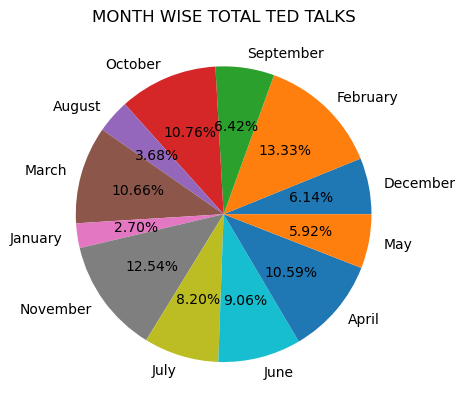

In [61]:
plt.pie(temp['no_of_ted_talks'],labels = temp['month'],autopct = '%.2f%%')
plt.title("MONTH WISE TOTAL TED TALKS")
plt.show()

**BASED ON THE ABOVE PIE CHART FEBRUARY HAD THE MOST NUMBER OF TED TALKS**
: Followed by **November,October,March and April** 

## Year - wise Analysis of Ted Talk frequency

In [87]:
data = []
for i in ted['year'].unique():
    data.append([i,year.count(i),ted[ted['year']==i]['likes'].sum(),ted[ted['year']==i]['views'].sum()])
temp = pd.DataFrame(data,columns = ['year','no_of_ted_talks','likes','views'])
temp

,year,no_of_ted_talks,likes,views
0,2021,390,13058238,429728700
1,2022,20,341254,11470000
2,2019,544,28764575,948119299
3,2016,399,28306782,928894896
4,2017,495,30516328,998891600
5,2020,501,19297014,635944200
6,2015,376,35151746,1154739598
7,2014,357,25076665,824652297
8,2018,473,24671493,811857597
9,1970,2,7500,252000


In [88]:
index = list(temp[temp['no_of_ted_talks']<=10].index)
temp.drop(index = index,inplace = True)               #dropping years with less than 10 ted talks

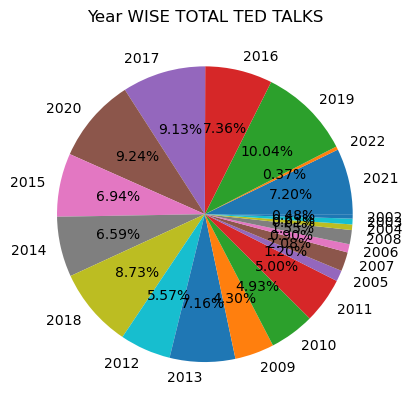

In [89]:
plt.pie(temp['no_of_ted_talks'],labels = temp['year'],autopct = '%.2f%%')
plt.title("Year WISE TOTAL TED TALKS")
plt.show()

**Therefore from the above pie chart we can confirm that 2019 had the most frequency of TED Talks**

## Finding ted talks of your favourite author

In [86]:
author = input("Enter your favourite author's name :")
temp = ted[ted['author']==author]
print("Ted Talks of "+author+':')
print('-'*60)
for i in temp['title']:
    print('*',i)
print('-'*60)

Enter your favourite author's name :Alex Gendler
Ted Talks of Alex Gendler:
------------------------------------------------------------
* Blood, concrete, and dynamite: Building the Hoover Dam
* The woman who stared at the sun
* How one design flaw almost toppled a skyscraper
* Demolition, disease, and death: Building the Panama Canal
* How the world's tallest skyscraper was built
* Why are airplanes slower than they used to be?
* Building the world's largest (and most controversial) power plant
* Can you solve the monster duel riddle?
* Can you solve the Alice in Wonderland riddle?
* The Egyptian myth of the death of Osiris
* Which voting system is the best?
* How do ventilators work?
* How the world's longest underwater tunnel was built
* Can you solve the death race riddle?
* The Egyptian myth of Isis and the seven scorpions
* Epic Engineering: Building the Brooklyn Bridge 
* Everything changed when the fire crystal got stolen
* Can you solve the dragon jousting riddle?
* Why doesn

In [92]:
ted.head(10)

,title,author,date,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021
5,The tragedy of air pollution — and an urgent d...,Rosamund Adoo-Kissi-Debrah,October 2021,422000,12000,https://ted.com/talks/rosamund_adoo_kissi_debr...,October,2021
6,The myth of Narcissus and Echo,Iseult Gillespie,February 2022,412000,12000,https://ted.com/talks/iseult_gillespie_the_myt...,February,2022
7,You deserve the right to repair your stuff,Gay Gordon-Byrne,August 2021,455000,13000,https://ted.com/talks/gay_gordon_byrne_you_des...,August,2021
8,What nature can teach us about sustainable bus...,Erin Meezan,February 2022,66000,1900,https://ted.com/talks/erin_meezan_what_nature_...,February,2022
9,The origins of blackface and Black stereotypes,Dwan Reece,March 2019,584000,17000,https://ted.com/talks/dwan_reece_the_origins_o...,March,2019


## Finding the Ted Talk with the best view to like ratio

In [101]:
view_to_like = []
for i in ted.values:
    view_to_like.append([i[0],i[3]/i[4]])
temp = pd.DataFrame(view_to_like,columns = ['title','view_to_like_ratio'])
print("The TED Talk with the best view to like ratio is :")
print('-'*30)
print(list(temp.sort_values(by = 'view_to_like_ratio',ascending = False)['title'])[0],': With ratio =',
      list(temp.sort_values(by = 'view_to_like_ratio',ascending = False)['view_to_like_ratio'])[0])

The TED Talk with the best view to like ratio is :
------------------------------
A camera that can see around corners : With ratio = 36.4


## Finding ted talks based on tags

In [110]:
tag = input("Enter your tag to find Ted talks : ")
print(" ")
print("The Ted Talks based on the tag entered : ")
print('-'*40)
for i in ted.values:
    if tag.lower() in i[0].lower():
        print(i[0])

Enter your tag to find Ted talks : climate
 
The Ted Talks based on the tag entered : 
----------------------------------------
Climate action needs new frontline leadership
Why is China appointing judges to combat climate change?
The ocean's ingenious climate solutions
How we're reducing the climate impact of electronics
How to boost nature-based solutions to climate change
The unexpected, underwater plant fighting climate change
Language shouldn't be a barrier to climate action
It's time to write a new climate story
Use your voice, vote and wallet for climate action
A next-generation solution to climate crisis
Community investment is the missing piece of climate action
Dear world leaders, these are our climate demands
An action plan for solving the climate crisis
Can climate change ever be funny? 17 comedians try to answer
The crucial intersection of climate and capital
The powerful women on the front lines of climate action
How small countries can make a big impact on climate change

## Finding the most popular Ted Talk author based on the number of views

In [114]:
temp = ted.sort_values(by = 'views',ascending = False)
print("The most popular Ted Talk based on views : ")
print('-'*40)
print(list(temp['author'])[0])

The most popular Ted Talk based on views : 
----------------------------------------
Sir Ken Robinson
